# Data Preprocessing

In [20]:
import pandas as pd
import pickle # for saving and loading trained model
import seaborn as sns
import matplotlib.pylab as plt


In [21]:
df = pd.read_csv('load_data.csv') # Loading the data set

In [22]:
df.head(100)

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type
0,01-01-2018 00:15,8.753692,2.95,0.0,0.0,73.210000,100.00000,900.000000,Light_Load
1,01-01-2018 00:30,4.000000,4.46,0.0,0.0,66.770000,100.00000,1800.000000,Light_Load
2,01-01-2018 00:45,3.240000,3.28,0.0,0.0,70.280000,100.00000,8070.880991,Light_Load
3,01-01-2018 01:00,3.310000,3.56,0.0,0.0,68.090000,100.00000,3600.000000,Light_Load
4,01-01-2018 01:15,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,Light_Load
...,...,...,...,...,...,...,...,...,...
95,01-01-2018 00:00,3.420000,3.46,0.0,0.0,70.300000,291.49819,0.000000,Light_Load
96,02-01-2018 00:15,3.200000,3.10,0.0,0.0,71.820000,100.00000,900.000000,Light_Load
97,02-01-2018 00:30,3.850000,NaN,0.0,0.0,64.100000,100.00000,1800.000000,Light_Load
98,02-01-2018 00:45,3.280000,3.67,0.0,0.0,66.640000,100.00000,2700.000000,Light_Load


In [23]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format="%d-%m-%Y %H:%M", errors='coerce')
'''
Here converting the Date_Time column to datatime format ("%d-%m-%Y %H:%M") using to_datetime() method  
and errors parameter is used to handle any errors during the conversion.

'''

'\nHere converting the Date_Time column to datatime format ("%d-%m-%Y %H:%M") using to_datetime() method  \nand errors parameter is used to handle any errors during the conversion.\n\n'

In [24]:
df = pd.get_dummies(df, columns=['Load_Type'], drop_first=False)
'''
Since Load_Type contains Categorical data here we go for One-hot encoding to convert
all the categories in Load_Type such as (Light_Load,Maximum_Load,Medium_Load)
into a binary matrix (0s and 1s).

Here i set drop_first=False because each unique category gets its own one-hot 
encoded column, and to retain information about all categories without assuming 
any specific reference category.
'''


'\nSince Load_Type contains Categorical data here we go for One-hot encoding to convert\nall the categories in Load_Type such as (Light_Load,Maximum_Load,Medium_Load)\ninto a binary matrix (0s and 1s).\n\nHere i set drop_first=False because each unique category gets its own one-hot \nencoded column, and to retain information about all categories without assuming \nany specific reference category.\n'

In [25]:
df.head()

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
0,2018-01-01 00:15:00,8.753692,2.95,0.0,0.0,73.210000,100.0,900.000000,True,False,False
1,2018-01-01 00:30:00,4.000000,4.46,0.0,0.0,66.770000,100.0,1800.000000,True,False,False
2,2018-01-01 00:45:00,3.240000,3.28,0.0,0.0,70.280000,100.0,8070.880991,True,False,False
3,2018-01-01 01:00:00,3.310000,3.56,0.0,0.0,68.090000,100.0,3600.000000,True,False,False
4,2018-01-01 01:15:00,3.820000,4.50,0.0,0.0,133.655666,NaN,4500.000000,True,False,False


In [26]:
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
'''
Here i am separating the datatime and numerical columns for the further purpose 
of preprocessing because DataFrame contains different kinds of data
'''

'\nHere i am separating the datatime and numerical columns for the further purpose \nof preprocessing because DataFrame contains different kinds of data\n'

# Handling NAN values 

In [27]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])
'''
Here numerical column contains NAN values so i imported SimpleImputer 
from sklearn.impute to handal NAN values, and i created imputer instance with
simpleimputer class ans set strstegy as 'median' becasue mean affected too badly by outliers ,imputer is applied on all numerical
columns and fill up the NAN values with median set back to original DF
'''

"\nHere numerical column contains NAN values so i imported SimpleImputer \nfrom sklearn.impute to handal NAN values, and i created imputer instance with\nsimpleimputer class ans set strstegy as 'median' becasue mean affected too badly by outliers ,imputer is applied on all numerical\ncolumns and fill up the NAN values with median set back to original DF\n"

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
'''
Here i imported the standardscaler module from sklearn to scale the numerical 
values for Model Performance,Better Interpretability,and after Normalization of Features
the values i have assigined bacl to the DataFrame
'''

'\nHere i imported the standardscaler module from sklearn to scale the numerical \nvalues for Model Performance,Better Interpretability,and after Normalization of Features\nthe values i have assigined bacl to the DataFrame\n'

In [29]:

X = df.drop(['Date_Time', 'Load_Type_Light_Load', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load'], axis=1)
y = df[['Load_Type_Light_Load', 'Load_Type_Maximum_Load', 'Load_Type_Medium_Load']]
'''
Here i am splitting the DataFrame into feature (X) and target (Y) here i am 
not included Date_Time because i don't have any contribution in predicting 
Target value (Y)
'''

"\nHere i am splitting the DataFrame into feature (X) and target (Y) here i am \nnot included Date_Time because i don't have any contribution in predicting \nTarget value (Y)\n"

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
'''
Here i imported train_test_split from sklearn to split the DF into 
training and testing sets , i have splited the 20% of DF as testing 
and set random_state=42 

'''

'\nHere i imported train_test_split from sklearn to split the DF into \ntraining and testing sets , i have splited the 20% of DF as testing \nand set random_state=42 \n\n'

# Model Selection,Training and Model Saving 

In [28]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

'''
here i used RandomForestClassifier as a model selection since it is a 
categorical data RandomForestClassifier best suited for it
'''
model = RandomForestClassifier(random_state=42)

'''
param_grid: This dictionary defines a range of hyperparameter values
for the RandomForestClassifier
'''
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

'''
GridSearchCV: This is a method for performing hyperparameter tuning. 
It exhaustively searches through a specified parameter grid, evaluates 
the model performance using cross-validation, and selects the best combination 
of hyperparameters.
'''

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

'''
best_estimator_ contains the model with the best combination 
of hyperparameters, as determined by the cross-validated performance.
'''
best_model = grid_search.best_estimator_

#saving the best_model for further using
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Loading trained model

In [31]:
with open('best_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Model Evaluation

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
'''
predicting the target using saved train model
and printing classification_report 
'''
y_pred = loaded_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3574
           1       0.78      0.76      0.77      1499
           2       0.79      0.76      0.77      1936

   micro avg       0.88      0.85      0.87      7009
   macro avg       0.85      0.82      0.83      7009
weighted avg       0.88      0.85      0.87      7009
 samples avg       0.85      0.85      0.85      7009



C:\Users\vk100\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# confusion matrix


         Class 0 : Light_Load
         Class 1 : Maximum_Load
         Class 2 : Medium_Load
      


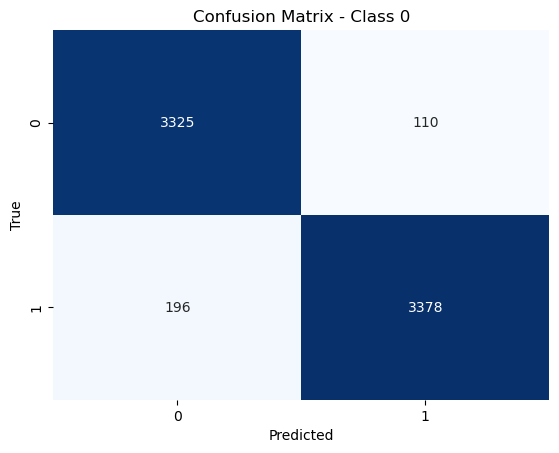

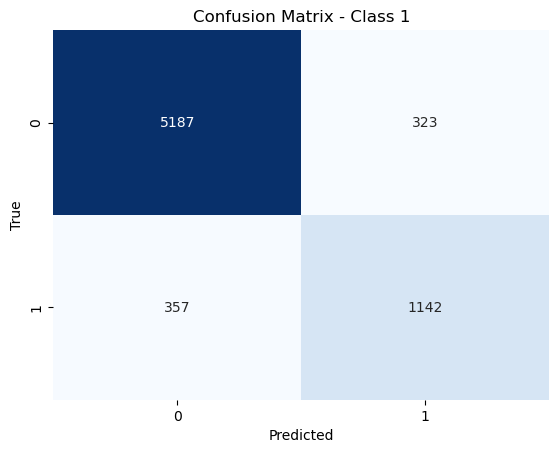

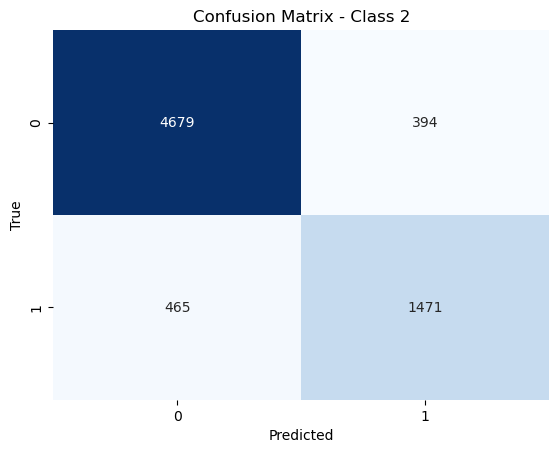

In [33]:
from sklearn.metrics import multilabel_confusion_matrix

# Createting a confusion matrix for each class
cm = multilabel_confusion_matrix(y_test, y_pred)

print('''
         Class 0 : Light_Load
         Class 1 : Maximum_Load
         Class 2 : Medium_Load
      ''')

# Displaying confusion matrices
for i in range(cm.shape[0]):
    sns.heatmap(cm[i], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - Class {i}')
    plt.show()
